In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix


In [22]:
df = pd.read_pickle("../data/reviews_vector.pkl")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890444 entries, 0 to 890443
Columns: 504 entries, overall to your
dtypes: float64(501), int64(2), object(1)
memory usage: 3.3+ GB


In [24]:
[df.columns[:3],df.columns[4:]]

[Index(['overall', 'reviewText', 'length'], dtype='object'),
 Index(['10', '100', '6s', 'abl', 'absolut', 'access', 'actual', 'ad', 'adapt',
        'add',
        ...
        'wont', 'work', 'worri', 'worth', 'would', 'wouldnt', 'wrong', 'year',
        'yet', 'your'],
       dtype='object', length=500)]

In [25]:
X=df[df.columns[4:]]
y=df["binary"]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [24]:
# testing for C value
penalties = [0.1, 1, 10, 100]

cvs1=[]

for c in penalties:
    # change depth each time
    estimators = [('normalise', StandardScaler()),
                ('model', LogisticRegression(C=c,penalty='l1', solver='liblinear',random_state=42))]
    pipe = Pipeline(estimators,verbose=True)
    # fitting
    pipe.fit(X_train, y_train)
    cvs =cross_val_score(pipe, X_train, y_train, cv=5).mean()
    cvs1.append(cvs)
    print(f"penalty: {c} Cross Validation accuracy: {cvs}")

[Pipeline] ......... (step 1 of 2) Processing normalise, total=   5.2s
[Pipeline] ............. (step 2 of 2) Processing model, total= 1.7min
[Pipeline] ......... (step 1 of 2) Processing normalise, total=   2.5s
[Pipeline] ............. (step 2 of 2) Processing model, total=  58.3s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=   1.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=  54.9s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=   1.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=  45.7s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=   1.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=  39.2s
[Pipeline] ......... (step 1 of 2) Processing normalise, total=   1.9s
[Pipeline] ............. (step 2 of 2) Processing model, total=  52.7s
penalty: 0.1 Cross Validation accuracy: 0.8684869201451523
[Pipeline] ......... (step 1 of 2) Processing normalise, total=   2.6s
[Pipeline] .......

In [25]:
cvs1

[0.8684869201451523, 0.8684883239396088, 0.8684911315285216, 0.868492535322978]

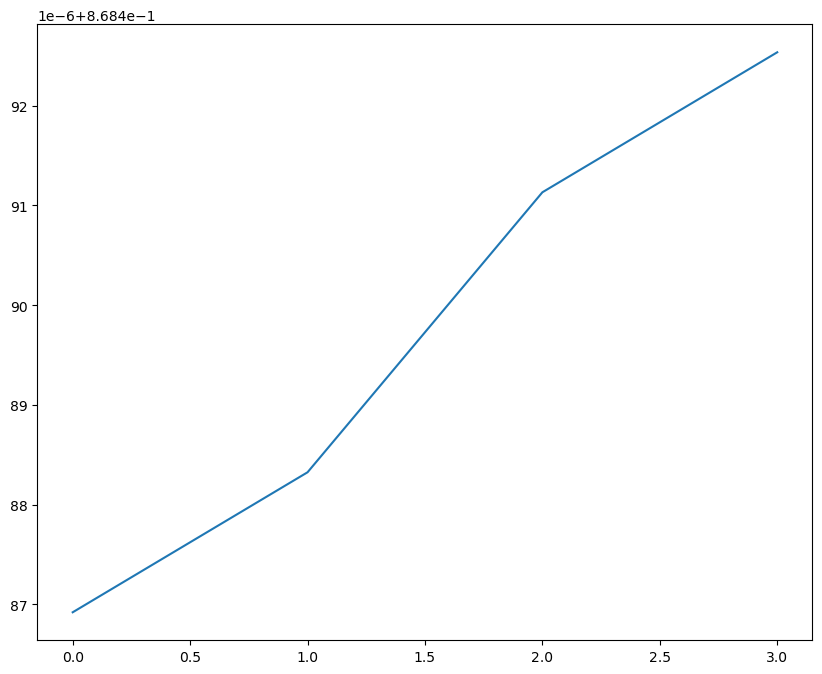

In [28]:
plt.figure(figsize=(10,8))
plt.plot(cvs1)

plt.show();

In [28]:


estimators = [('normalise', StandardScaler()), 
              ('model', LogisticRegression(C=1,penalty='l1', solver='liblinear',random_state=42))]
pipe_final = Pipeline(estimators,verbose=True)

In [29]:
pipe_final.fit(X_train, y_train)


[Pipeline] ......... (step 1 of 2) Processing normalise, total=   6.1s
[Pipeline] ............. (step 2 of 2) Processing model, total= 1.8min


Pipeline(steps=[('normalise', StandardScaler()),
                ('model',
                 LogisticRegression(C=1, penalty='l1', random_state=42,
                                    solver='liblinear'))],
         verbose=True)

In [30]:
log_clas = pipe_final[-1]


In [31]:
log_clas

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [32]:
log_clas.score(X_train_transformed, y_train)

0.8690484379277186

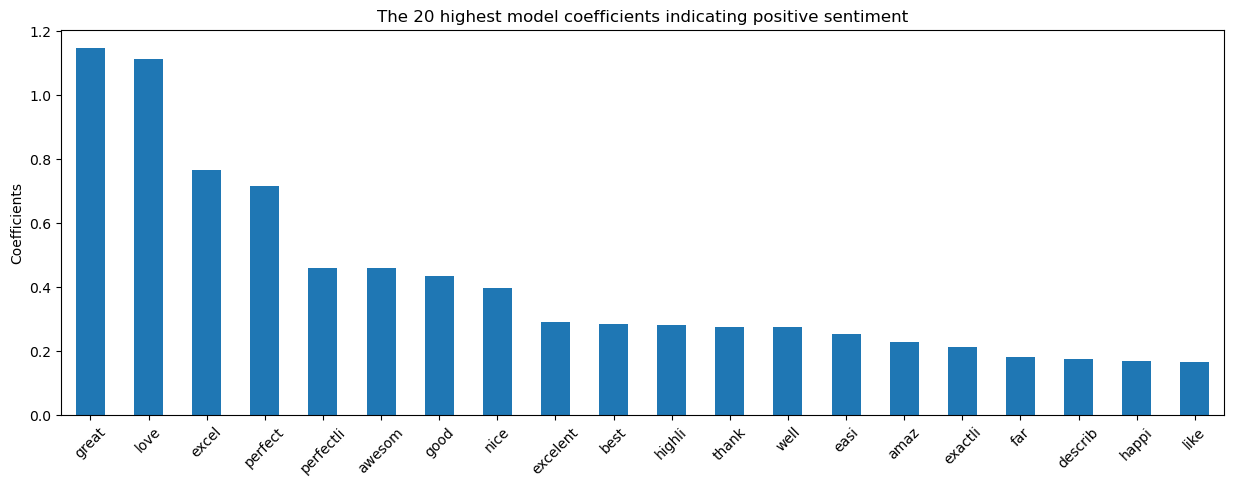

In [34]:
word_counts = pd.DataFrame(
    {"coefficients": log_clas.coef_[0]},
    index=X_train.columns
).sort_values("coefficients", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)

plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

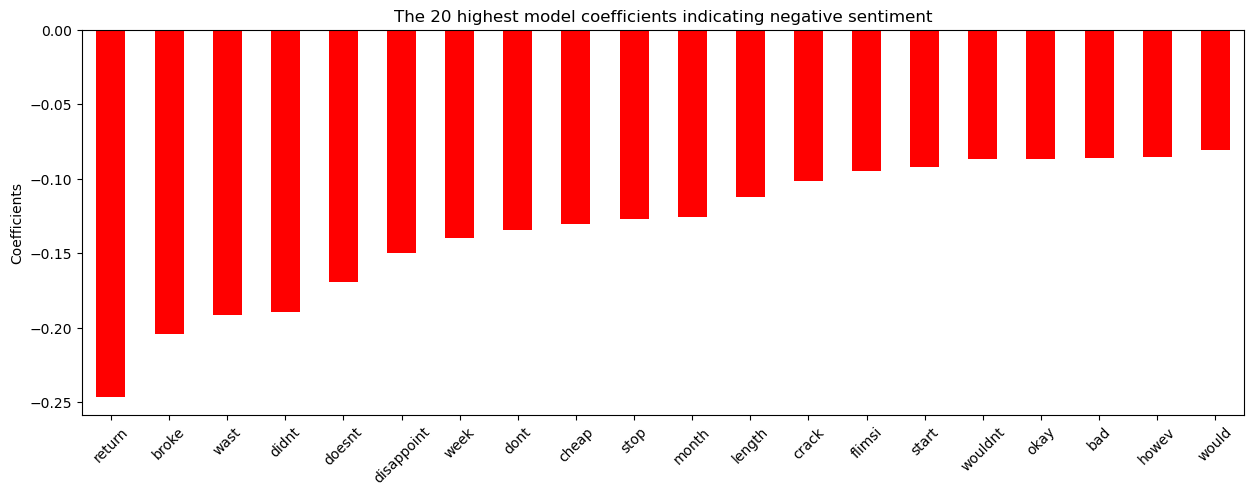

In [35]:
word_counts = pd.DataFrame(
    {"coefficients": log_clas.coef_[0]},
    index=X_train.columns
).sort_values("coefficients", ascending=True)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False, color='red')

plt.title("The 20 highest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [36]:
print(f"Train score: {log_clas.score(X_train_transformed, y_train)}")
print(f"Test score: {log_clas.score(X_test_transformed, y_test)}")


Train score: 0.8690484379277186
Test score: 0.868363571023477


In [37]:
y_pred_baseline_test= log_clas.predict(X_test_transformed)

cm = confusion_matrix(y_test, y_pred_baseline_test, normalize="true")

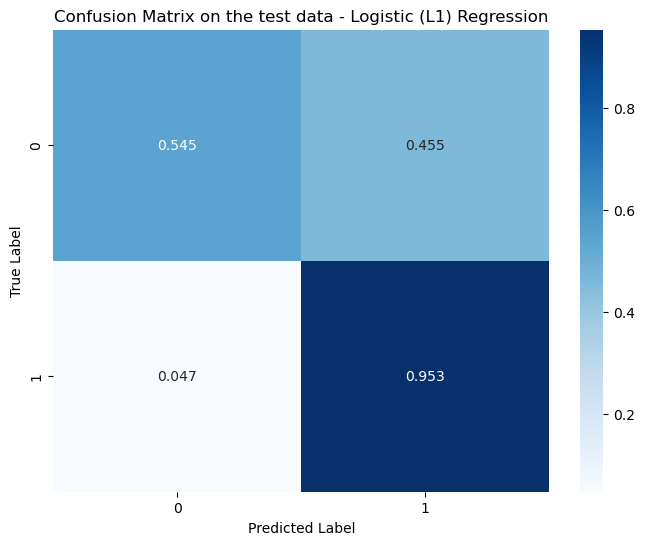

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Logistic (L1) Regression")
plt.show()

In [39]:
y_pred_baseline= log_clas.predict(scaler.transform(df[df.columns[4:]]))


In [40]:
incorrect_guesses = df["binary"] != y_pred_baseline
incorrect_v = pd.Series(y_pred_baseline)[incorrect_guesses]
pd.concat([pd.Series(incorrect_v),df[incorrect_guesses]], axis=1)


,0,overall,reviewText,length,binary,10,100,6s,abl,absolut,...,wont,work,worri,worth,would,wouldnt,wrong,year,yet,your
2,1,3.0,"so the case came on time, i love the design. I...",257,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.206292,0.0
16,1,2.0,I used this case for not even a week and the b...,118,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.242558,0.0,0.0,0.0,0.000000,0.0
58,0,4.0,The case is pretty and looks closely to the on...,434,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
64,1,3.0,The idea of the design is a sweet idea but it ...,216,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
66,1,3.0,"Pretty, but not as bright and vivid as in the ...",299,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890411,1,1.0,"I've purchased a pack of 3, all worked fine fo...",145,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.197159,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
890414,1,1.0,The cables eventually fail delivering a charge...,236,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
890415,0,5.0,Didn't think I would like it because I'm use t...,132,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.188013,0.0,0.0,0.0,0.000000,0.0
890436,1,1.0,The glass screen was smashed when it arrived.,45,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
